In [1]:
import numpy as np

# Initial weight vectors
WS = np.array([1, 0, 0, 0, 0])
WP = np.array([0, 0, 0, 0, 0])
WT = np.array([0, 0, 0, 0, 0])

# Feature vectors and true class labels
features = [np.array([1, 1, 0, 1, 1]), np.array([1, 1, 0, 0, 1]), np.array([1, 1, 1, 0, 1])]
labels = ['P', 'P', 'S']

# Dictionary to map class labels to weight vectors
weights = {'S': WS, 'P': WP, 'T': WT}

# Function to perform the perceptron learning algorithm
def multiclass_perceptron(features, labels, weights):
    for i, feature in enumerate(features):
        true_label = labels[i]

        # Calculate predictions (dot product with each weight vector)
        predictions = {label: np.dot(weight, feature) for label, weight in weights.items()}

        # Determine the predicted label
        predicted_label = max(predictions, key=predictions.get)

        # Update weights if prediction is incorrect
        if predicted_label != true_label:
            # Reduce the weight of the incorrectly predicted class
            weights[predicted_label] -= feature
            # Increase the weight of the correct class
            weights[true_label] += feature

        print(f"After sample {i+1} with true label '{true_label}':")
        for label, weight in weights.items():
            print(f"Weight vector for class {label}: {weight}")

# Run the perceptron algorithm
multiclass_perceptron(features, labels, weights)


After sample 1 with true label 'P':
Weight vector for class S: [ 0 -1  0 -1 -1]
Weight vector for class P: [1 1 0 1 1]
Weight vector for class T: [0 0 0 0 0]
After sample 2 with true label 'P':
Weight vector for class S: [ 0 -1  0 -1 -1]
Weight vector for class P: [1 1 0 1 1]
Weight vector for class T: [0 0 0 0 0]
After sample 3 with true label 'S':
Weight vector for class S: [ 1  0  1 -1  0]
Weight vector for class P: [ 0  0 -1  1  0]
Weight vector for class T: [0 0 0 0 0]


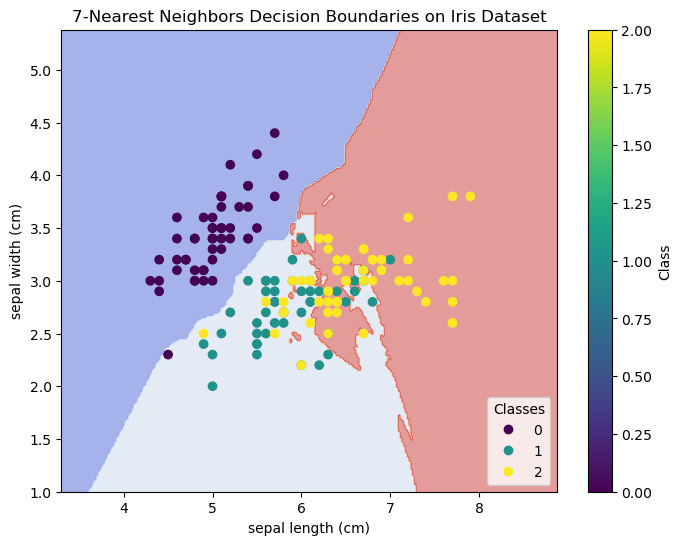

In [5]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Use only the first two features for simplicity
X = iris.data[:, :2]
y = iris.target

# Create the k-NN model with k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Create a mesh to plot the decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary by assigning a color in the color map to each mesh point
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')  # Changed colormap to coolwarm

# Plot also the training points with different colors
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')  # Changed colormap to viridis
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
plt.title("7-Nearest Neighbors Decision Boundaries on Iris Dataset")
plt.colorbar(label='Class')
plt.show()
